# Análisis predictivo del precio de la vivienda

## 1. Importación de los datos

In [401]:
# Importación de librerías
# Por ordenación, importo las librerías que se van a utilizar en el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

In [402]:
# Trabajo el notebook con un environment de conda y lo programo con visual studio code
# El dataset está a nivel de la carpeta del proyecto
# Cargo el dataset
df_house_data = pd.read_csv('data.csv')

In [403]:
# Compruebo que se ha cargado correctamente
df_house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## 2. Análisis exploratorio de los datos

Mostramos los nombres y el tipo de dato de las columnas del dataframe

In [404]:
df_house_data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [405]:
df_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

El dataset tiene 4600 filas y 18 columnas, con la información del precio de viviendas en USA,
las columnas son: 
* **date**: fecha de venta
* **price**: precio de la vivienda
* **bedrooms**: número de habitaciones
* **bathrooms**: número de baños
* **sqft_living**: metros cuadrados de la vivienda
* **sqft_lot**: metros cuadrados del terreno
* **floors**: número de plantas
* **waterfront**: si tiene vista al mar
* **view**: número de vistas
* **condition**: condición de la vivienda
* **sqft_above**: metros cuadrados de la vivienda sin contar el sótano
* **sqft_basement**: metros cuadrados del sótano
* **yr_built**: año de construcción
* **yr_renovated**: año de renovación
* **street**: calle
* **city**: ciudad
* **statezip**: código postal
* **country**: país

Hay un campo de fecha, y cuatro campos categóricos referidos a la ubicación de la vivienda, el resto son numéricos, de estos numéricos, hay 4 que son continuos y el resto son discretos, por lo que serán tratados como categóricos. 


Vamos a comprobar si hay valores nulos en el dataset

In [406]:
df_house_data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

El dataset no tiene valores nulos, por lo que no es necesario tratarlos.

Mostramos la información estadística del dataset

In [407]:
df_house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


El campo **country** tiene un único valor, por lo que no aporta información, por lo que lo podemos eliminar.

De la exploración de los datos, podemos sacar las siguientes conclusiones:

* Hay variables numéricas que tienen que tratarse de forma categórica, porque son discretas, como por ejemplo el número de habitaciones, el número de baños, el número de plantas, el número de vistas, la condición de la vivienda, el año de construcción, el año de renovación, etc.

* El campo **date**, que tiene la fecha de la venta de la vivienda, tampoco lo vamos a tratar ya que no tiene información relevante, por lo que lo podemos eliminar.



In [408]:
df_house_data['country'].value_counts()

USA    4600
Name: country, dtype: int64

El campo **country** tiene un único valor, por lo que no aporta información, por lo que lo podemos eliminar.

In [409]:
df_house_data['street'].value_counts()

2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: street, Length: 4525, dtype: int64

El campo **street** tiene demasiados valores únicos, lo eliminamos para no tener cálculos muy grandes a la hora de convertirlo en variable numérica.

In [410]:
df_house_data.statezip.value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

Según vemos en el campo **statezip**, hay 77 valores únicos, pero todos son códigos postales, y son todos del mismo estado de Whashington, al haber también tantos valores únicos, no lo voy a considerar en el análisis.

In [411]:
df_house_data.city.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

El mismo criterio voy a seguir con la variable **city**.

Vamos a eliminar los campos **country**, **city**, **statezip**, **street** y **date**., por lo motivos ya comentados, el campo **country** tiene un único valor, los campos **street**, **city** y **statezip** tienen demasiados valores únicos, y el campo **date** no tiene información relevante. El resto de campos vamos a verlos más en detalle.

In [412]:
cols_to_ignore =  ['country', 'street', 'city', 'date', 'statezip']
df_house_data_simplified = df_house_data.drop(cols_to_ignore, axis=1)

Otro dato, que vemos en la función `describe`, es que parece que hay casas con valor 0 en el campo **price**, vamos a ver si es así. Y también, que el valor máximo es mucho mayor que el valor medio.

In [413]:
price_zero= df_house_data[df_house_data.price==0]
print(f'Tenemos {len(price_zero)} casas con precio 0')

Tenemos 49 casas con precio 0


In [414]:
print(f'El precio medio de las casas es ${df_house_data.price.mean():,.0f} y la mediana es ${df_house_data.price.median():,.0f}')
print(f'El valor máximo es ${df_house_data.price.max():,.0f}')

El precio medio de las casas es $551,963 y la mediana es $460,943
El valor máximo es $26,590,000


Vemos que hay 49 con precio 0, vamos a eliminarlas para no añadir confusión al modelo posteriormente.
También vemos que hay casas con un precio muy alto, respecto a la media de las viviendas, también vamos a ignorarlas, para no añadir ruido al modelo.

Un caso parecido es con el número de habitaciones, ya que el describe nos muestra que hay casas con 0 habitaciones

In [415]:
bedrooms_zero = df_house_data[df_house_data.bedrooms==0]
print(f'Tenemos {len(bedrooms_zero)} casas con 0 habitaciones')

Tenemos 2 casas con 0 habitaciones


Aunque son pocas, vamos a eliminarlas, ya que crean ruido en el modelo.

In [416]:
df_house_data_simplified = df_house_data_simplified[(df_house_data_simplified.price < 2.5*10**7 )
                                                    & (df_house_data_simplified.price > 0)
                                                    & (df_house_data_simplified.bedrooms > 0)]


In [417]:
df_house_data_simplified.price.describe()

count    4.548000e+03
mean     5.519017e+05
std      4.110606e+05
min      7.800000e+03
25%      3.260750e+05
50%      4.650000e+05
75%      6.572000e+05
max      1.289900e+07
Name: price, dtype: float64

## 3. Análisis visual de los datos

Vamos a ver la distribución de los datos de las columnas restantes

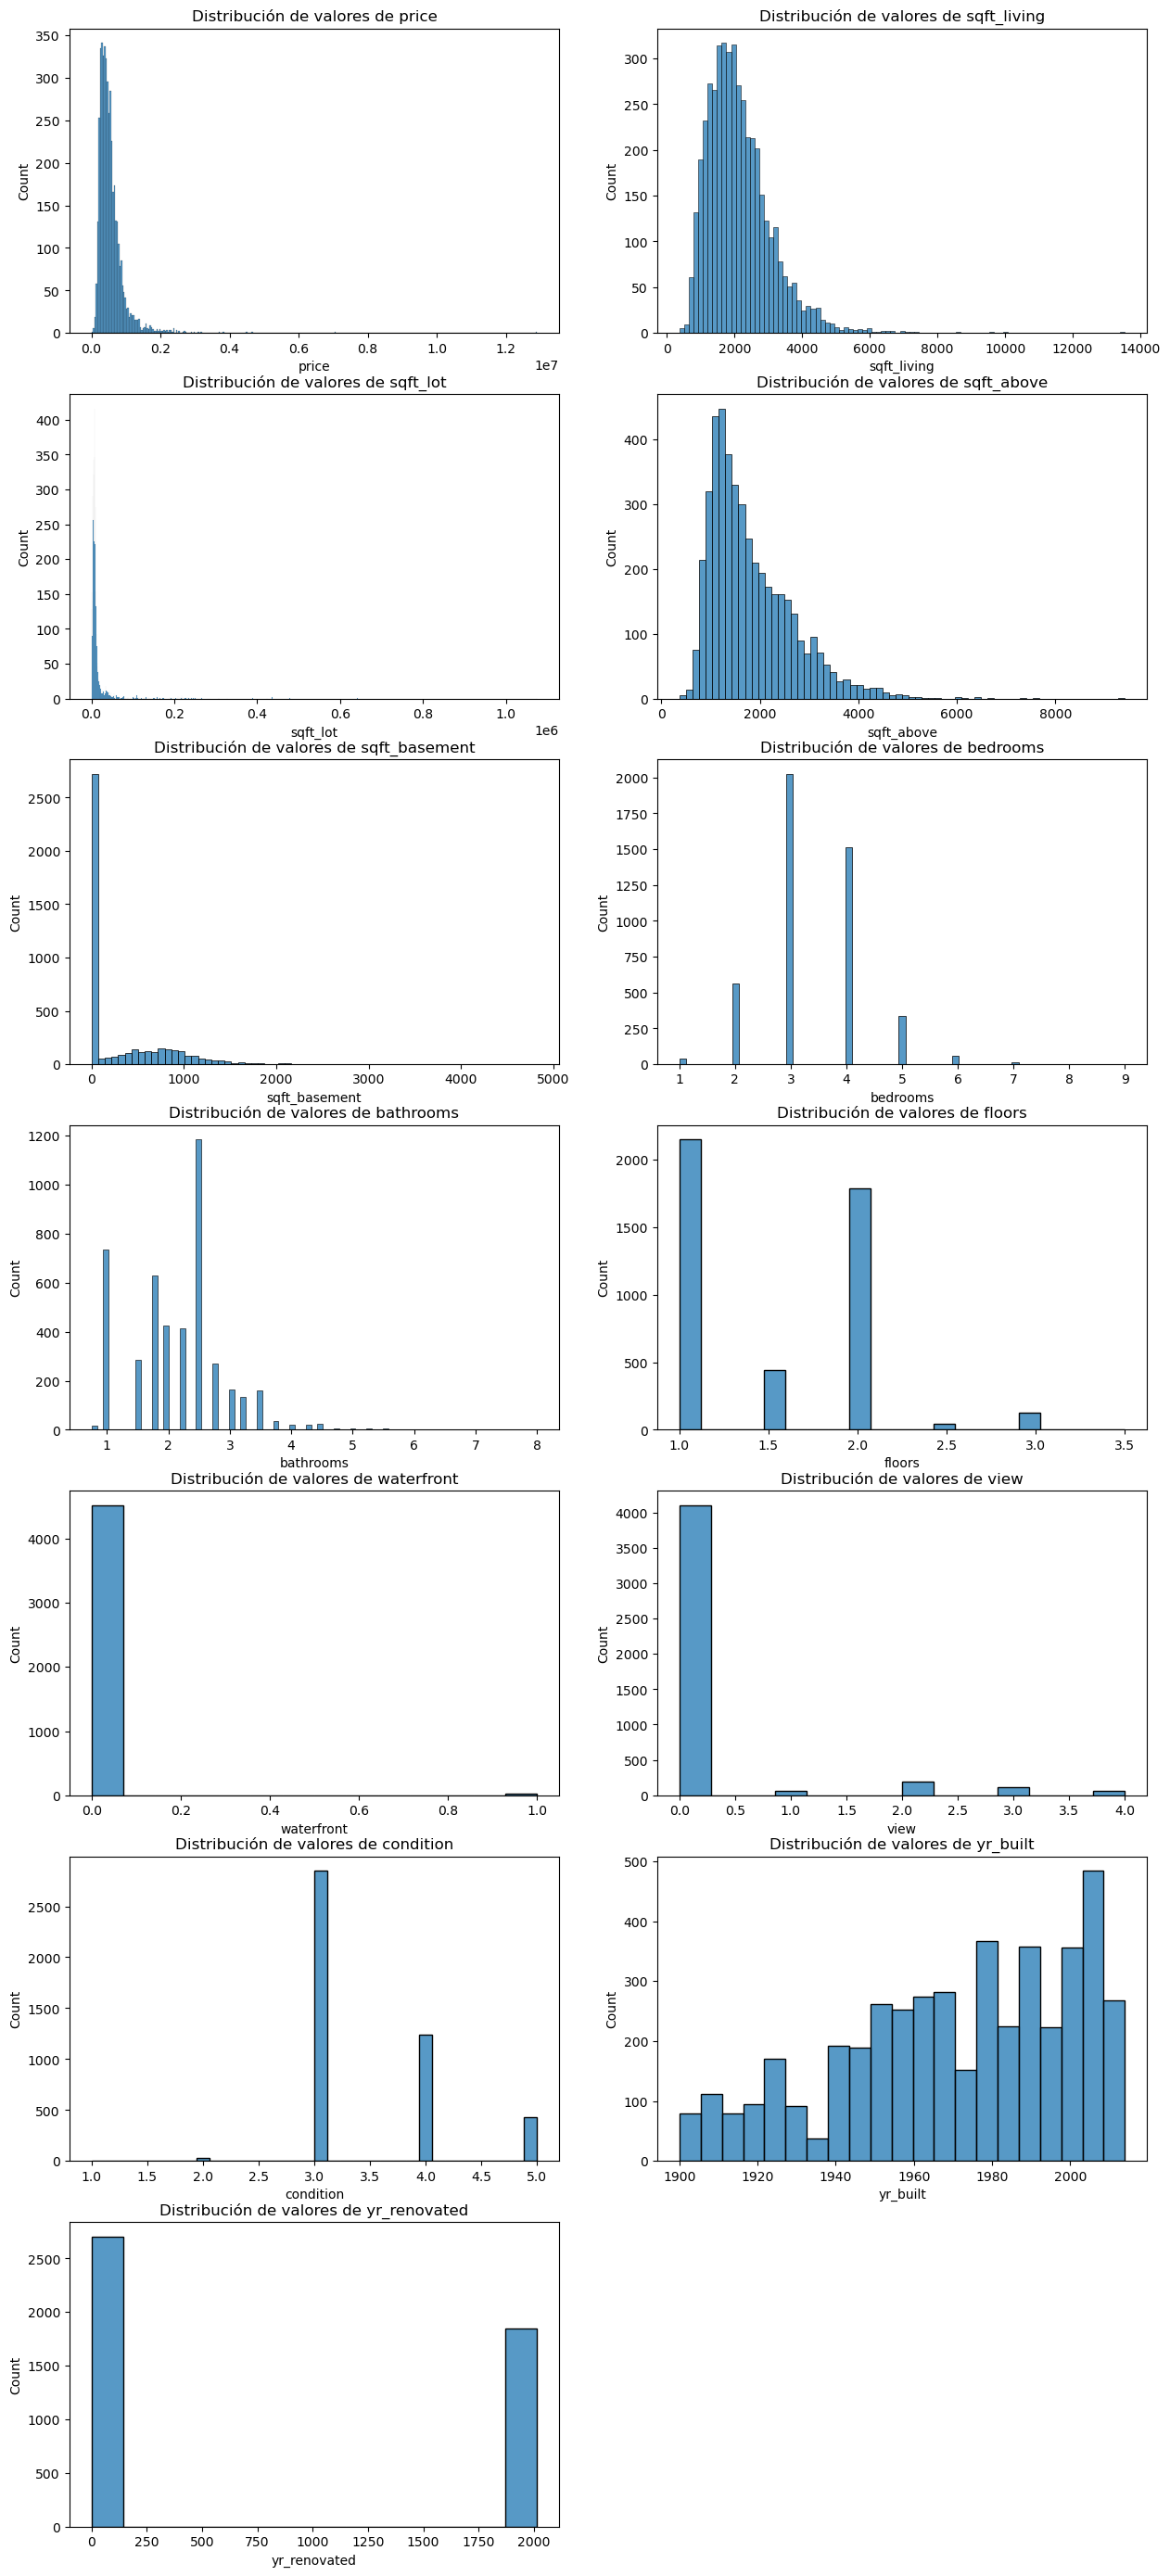

In [418]:
features_1 = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
'bedrooms', 'bathrooms',  'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated']

num_columns = len(features_1)
num_rows = int(np.ceil(num_columns / 2))

fig, axs = plt.subplots(num_rows, 2, figsize=(15, 35))

counter = 0

for columna in features_1:
    row = int(np.floor(counter / 2))
    column = counter % 2
    
    sns.histplot(ax=axs[row, column], data=df_house_data_simplified, x=columna)
    axs[row, column].set_title(f'Distribución de valores de {columna}')
    axs[row, column].set_axis_on()
    counter += 1

# El último ax, lo podemos eliminar
if counter <= num_columns:    
    axs.flat[-1].set_axis_off()

plt.show()

La gráficas de distribución y de total de precio por campo, nos permite observar si hay valores atípicos, la conclusiones al analizar estas gráficas son:

- El campo **price** sigue una distribución normal, aunque tiene una cola larga a la derecha, por lo que hay valores atípicos.
- El campo **bedrooms** tiene pocos valores de 8 y 9 habitaciones, por lo tanto, podríamos añadir estos valores a la categoría de 7 habitaciones.
- El campo **bathrooms** tiene pocos valores de 6, 7 y 8 baños, por lo tanto, podríamos añadir estos valores a la categoría de 6 baños.
- El campo **sqft_basement** tiene muchos valores 0, que indican que la casa no tiene sotano, además tiene también una larga cola a la derecha, podemos no tener en cuenta este campo.
- El campo **sqft_lot** tiene una larga cola a la derecha, por lo que hay valores atípicos.
- El campo **waterfront** tiene muchos valores 0, que indican que la mayoria de casas no tienen vista al mar. 
- El campo **yr_renovated** tiene muchos valores 0, que indican que la casa no ha sido renovada. Vamos a crear una nueva columna que indique si la casa ha sido renovada o no, y la vamos a llamar **renovated**.
- Hay más casas construidas recientemente que antiguas.

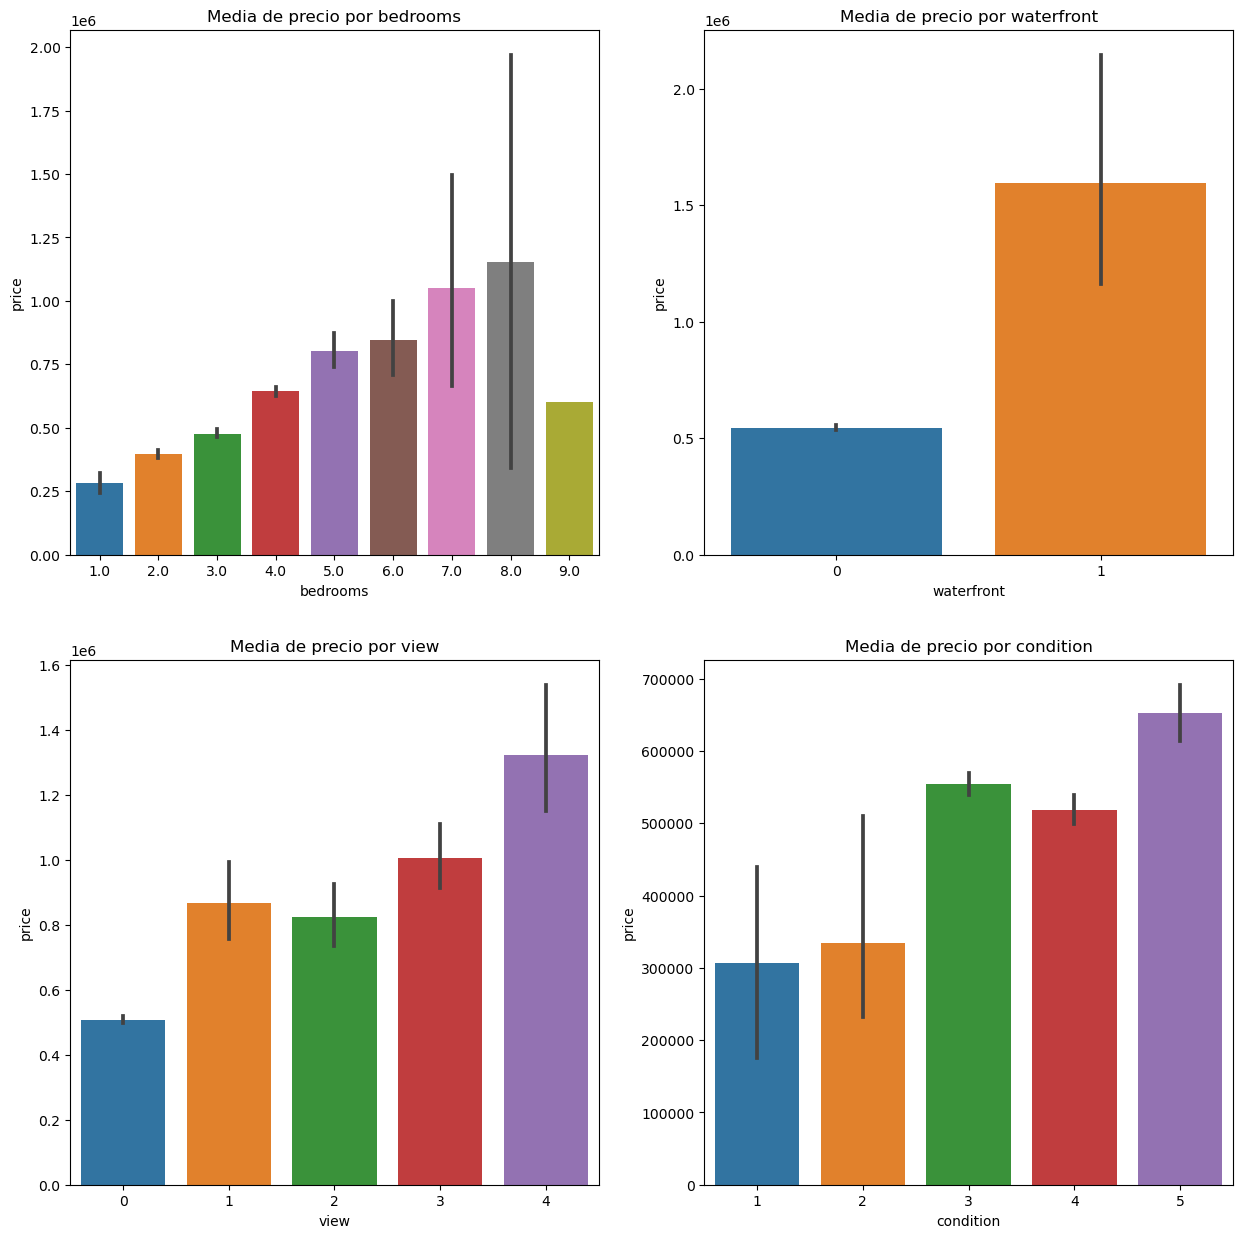

In [419]:
features_2 = ['bedrooms', 'waterfront', 'view', 'condition']

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

counter = 0

for cat in features_2:
    row = int(np.floor(counter / 2))
    column = counter % 2
    
    sns.barplot(ax=axs[row, column], data=df_house_data_simplified, x=cat, y='price', estimator=np.mean)
    axs[row, column].set_title(f'Media de precio por {cat}')    
    counter += 1

plt.show()


- Para los campos **view**, **condition**, **bedrooms**, y **waterfront**, hay cierta relación a la hora de predecir el precio de la casa, ya que el precio de la casa aumenta a medida que aumenta el valor de estas variables.

Hacemos una gráfica para ver la relación entre el precio y el area de vivienda

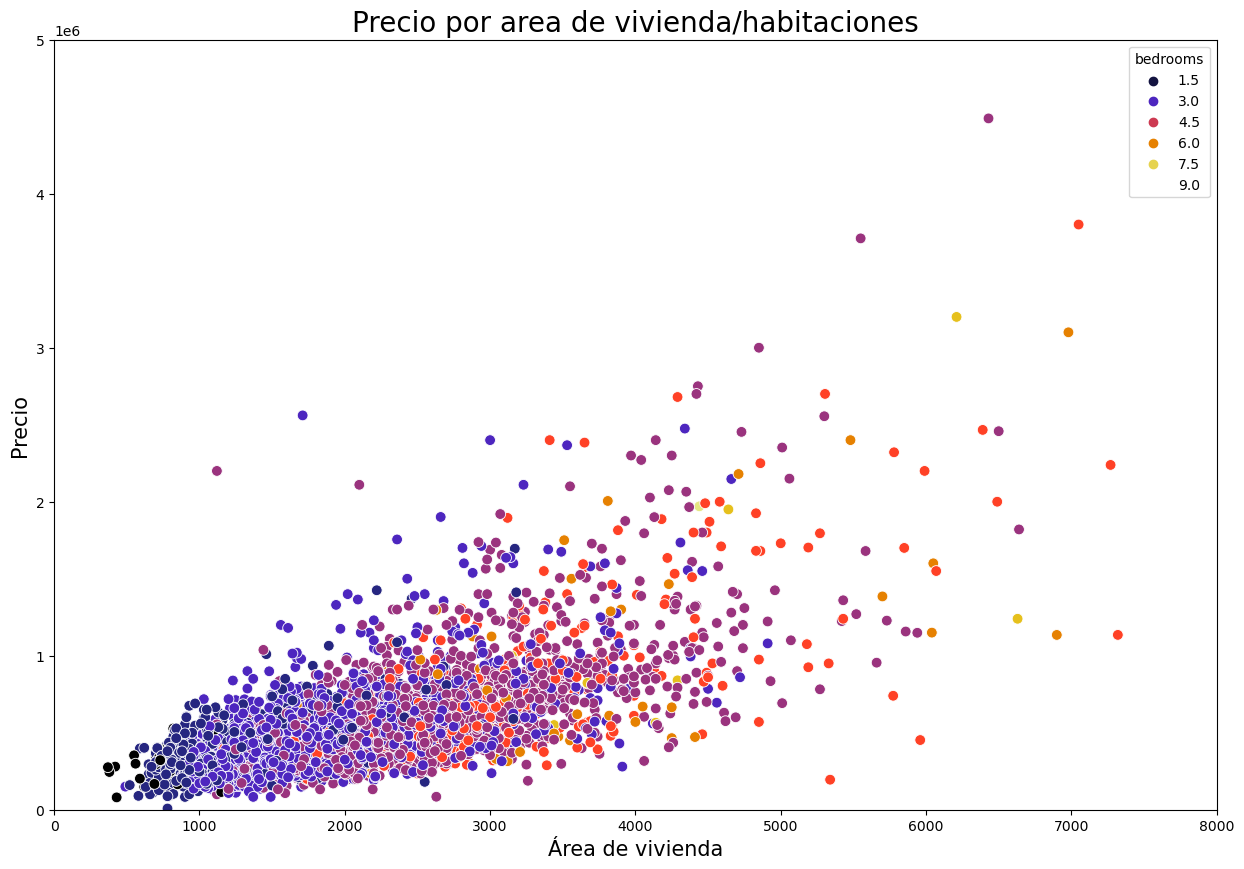

In [420]:
plt.figure(figsize=(15,10))

plt.title('Precio por area de vivienda/habitaciones', fontsize=20)
sns.scatterplot(data=df_house_data_simplified, x='sqft_living', y='price', hue='bedrooms', palette='CMRmap', s=60)
plt.ylabel('Precio', fontsize=15)
plt.xlabel('Área de vivienda', fontsize=15)
plt.ylim(0, 0.5*10**7)
plt.xlim(0, 8000)
plt.show()

Está gráfica nos muestra que hay una cierta relación entre el precio y el area de vivienda, y también con el número de habitaciones. Los puntos negros y azules están en areas de vivienda pequeñas, y los puntos rojos y naranjas están en areas de vivienda grandes.

## 4. Preparación de los datos y mapa de correlación

Vamos a aplicar las correciones que hemos indicado en el apartado anterior.

In [421]:
df_house_data_simplified['bedrooms_recoded'] = df_house_data_simplified['bedrooms'].apply(lambda x: 7 if x > 7 else x)
df_house_data_simplified['bathrooms_recoded'] = df_house_data_simplified['bathrooms'].apply(lambda x: 6 if x > 6 else x)
df_house_data_simplified['renovated'] = df_house_data_simplified['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [422]:
# Finalmente tenemos las siguientes features a mostrar en el mapa de correlación
features_corr = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
'bedrooms_recoded', 'bathrooms_recoded',  'floors', 'waterfront', 'view', 'condition', 'yr_built', 'renovated']

df_house_data_corr = df_house_data_simplified[features_corr]
df_house_data_corr.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,bedrooms_recoded,bathrooms_recoded,floors,waterfront,view,condition,yr_built,renovated
0,313000.0,1340,7912,1340,0,3.0,1.50,1.5,0,0,3,1955,1
1,2384000.0,3650,9050,3370,280,5.0,2.50,2.0,0,4,5,1921,0
2,342000.0,1930,11947,1930,0,3.0,2.00,1.0,0,0,4,1966,0
3,420000.0,2000,8030,1000,1000,3.0,2.25,1.0,0,0,4,1963,0
4,550000.0,1940,10500,1140,800,4.0,2.50,1.0,0,0,4,1976,1


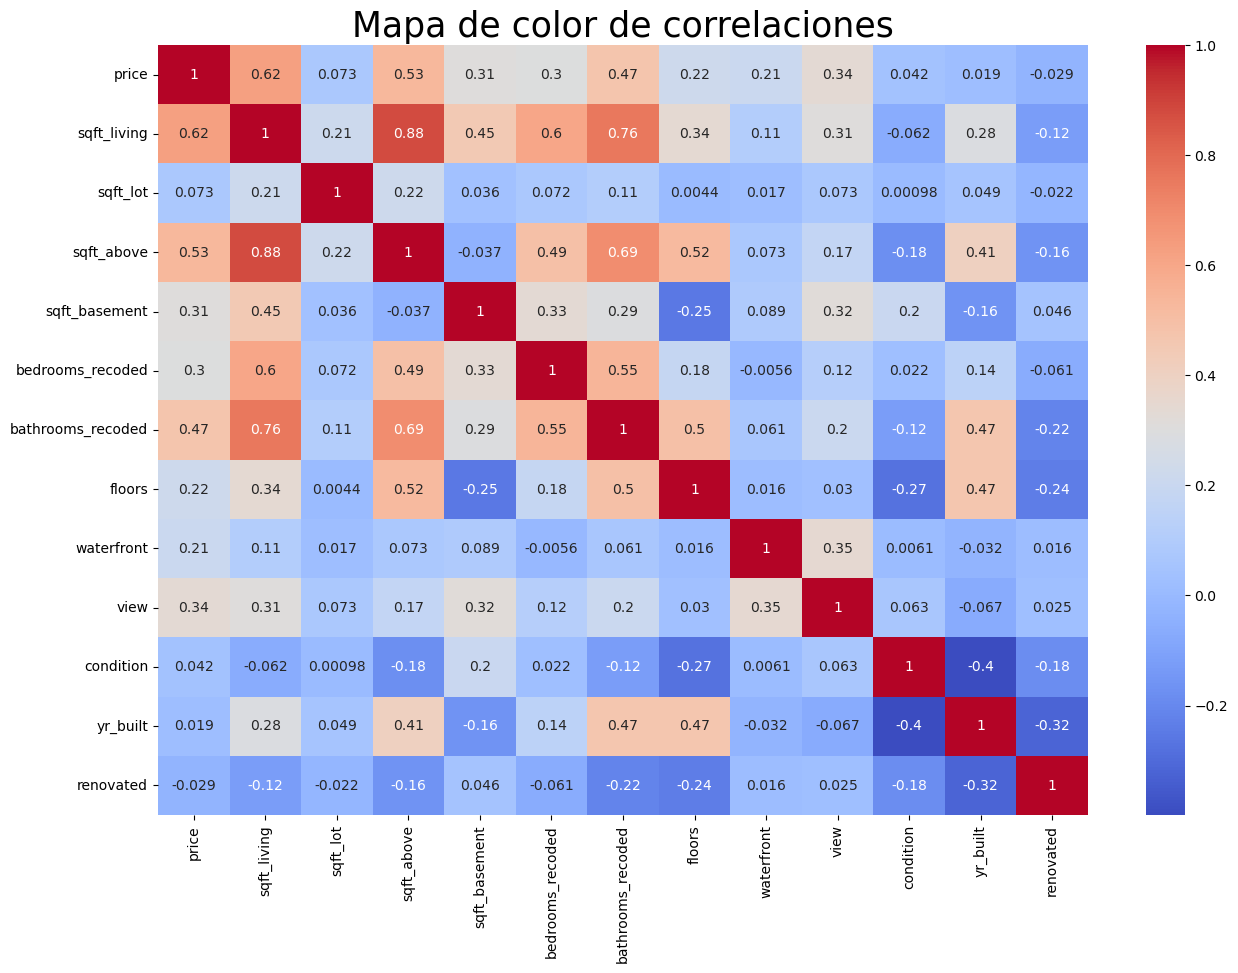

In [423]:
def mapa_correlacion():
    plt.figure(figsize=(15,10))
    plt.title('Mapa de color de correlaciones', fontsize=25)

    sns.heatmap(df_house_data_corr.corr(), annot=True, cmap='coolwarm', cbar=True, linewidths=0, linecolor='white',)    
    plt.show()

mapa_correlacion()

En el mapa de correlación, podemos sacar las siguientes conclusiones:

- El campo que tiene una mayor correlación con el precio es **sqft_living**, que es el area de la vivienda.
- El segundo campo con mayor correlación con el precio es **sqft_above**, que es el area de la vivienda sin contar el sotano.
- Entre estos dos campos, hay una correlación del 88%, por lo que podemos eliminar uno de ellos, y nos quedamos con **sqft_living**.
- Hay una correlación del 76% entre el campo **bathrooms_recoded** y **sqft_living**, por lo que podemos eliminar uno de ellos, y nos quedamos con **sqft_living**.
- Utilizaremos los campos **floors**, **waterfront**, **view** en una primera instancia, ya que tienen una correlación con el precio. También utilizaremos el campo **renovated** y **condition** que hemos creado aunque no tienen una correlación muy alta, ya que nos parece que pueden tener una influencia en el precio.   

## 5. Entrenamiento y predicción de los datos

Creamos el dataset final, con las columnas que vamos a utilizar para el entrenamiento del modelo.

In [424]:
features_final = ['sqft_living', 'bedrooms_recoded', 'floors', 'waterfront', 'view', 'condition', 'renovated', 'price']

df_house_data_final = df_house_data_corr[features_final]

df_house_data_final.head()

,sqft_living,bedrooms_recoded,floors,waterfront,view,condition,renovated,price
0,1340,3.0,1.5,0,0,3,1,313000.0
1,3650,5.0,2.0,0,4,5,0,2384000.0
2,1930,3.0,1.0,0,0,4,0,342000.0
3,2000,3.0,1.0,0,0,4,0,420000.0
4,1940,4.0,1.0,0,0,4,1,550000.0


In [425]:
df_house_data_final.shape

(4548, 8)

**price** es la variable objetivo, y las demás son las variables predictoras.

Tenemos una variables numérica, **sqft_living** y el resto son variables categóricas.

Vamos a utilizar el algoritmo de regresión lineal, para predecir el precio de las casas.
Para evaluar los resultados obtenidos, vamos a utilizar el MSE (error cuadrático medio) como métrica.


### 5.1 Hipótesis 1: Transformación de las variables categóricas en numéricas

En la primera hipótesis, vamos a transformar las variables categóricas en numéricas, utilizando el método de one-hot encoding. No hago una primera hipótesis con solo las variables numéricas ya que solo tengo dos, y son pocas para poder sacar conclusiones. No incluyo el campo

In [426]:
categorical_features = ['bedrooms_recoded', 'floors', 'waterfront', 'view', 'condition', 'renovated']

df_house_data_hip1 = pd.get_dummies(data=df_house_data_final,
                                    columns=categorical_features,
                                    prefix='OHE',
                                    prefix_sep='_',
                                    drop_first=True,
                                    dtype=np.int8)


In [427]:
df_house_data_hip1.head()

,sqft_living,price,OHE_2.0,OHE_3.0,OHE_4.0,OHE_5.0,OHE_6.0,OHE_7.0,OHE_1.5,OHE_2.0,...,OHE_1,OHE_1,OHE_2,OHE_3,OHE_4,OHE_2,OHE_3,OHE_4,OHE_5,OHE_1
0,1340,313000.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,3650,2384000.0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,1930,342000.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2000,420000.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1940,550000.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


Con el one-hot encoding, se crea una columna por cada valor de la variable categórica, y se asigna un 1 si el valor de la fila es igual al valor de la columna, y un 0 si no lo es. Nos queda un total de 24 columnas, y una de ellas es la variable objetivo.

Creamos los dataframe con las variables independientes y la variables dependiente, respectivamente.

In [428]:
X_hipot1 = df_house_data_hip1.drop('price', axis=1)
y_hipot1 = df_house_data_hip1['price']

Creamos los dataframe de entrenamiento y test, con un 80% de los datos para entrenamiento y un 20% para test.

A continuación creamos el modelo de regresión lineal, y lo entrenamos con los datos de entrenamiento.

In [429]:
X_hipot1_train, X_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(X_hipot1, y_hipot1, test_size=0.2, random_state=42)

linear_regression_1 = LinearRegression()
linear_regression_1.fit(X_hipot1_train, y_hipot1_train)

LinearRegression()

Calculamos el MSE:

Creo una función que me servirá para esta y las siguientes hipotesis

In [430]:
def calculate_mse(X_train, X_test, y_train, y_test, model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'MSE train: {mse_train}')
    print(f'MSE test: {mse_test}')

In [431]:
print('Hipótesis 1')
calculate_mse(X_hipot1_train, X_hipot1_test, y_hipot1_train, y_hipot1_test, linear_regression_1)

Hipótesis 1
MSE train: 317726.4444812114
MSE test: 252544.33512801703


Los valores obtenidos son muy altos, vamos a probar con una nueva hipotesis.

### 5.2 Hipótesis 2: Normalización de la variable objetivo

Vamos a normalizar la variable objetivo `price`, para ver si mejora el resultado.

In [432]:
df_house_data_hip2 = pd.get_dummies(data=df_house_data_final,
                                    columns=categorical_features,
                                    prefix='OHE',
                                    prefix_sep='_',
                                    drop_first=True,
                                    dtype=np.int8)

In [433]:
X_hipot2 = df_house_data_hip2.drop('price', axis=1)
y_hipot2 = df_house_data_hip2['price']

Escalamos `price` con StandardScaler

In [434]:
scaler = StandardScaler()

y_hipot2 = scaler.fit_transform(y_hipot2.values.reshape(-1, 1))
y_hipot2 = y_hipot2.ravel()

In [435]:
X_hipot2_train, X_hipot2_test, y_hipot2_train, y_hipot2_test = train_test_split(X_hipot2, y_hipot2, test_size=0.2, random_state=42)

linear_regression_2 = LinearRegression()
linear_regression_2.fit(X_hipot2_train, y_hipot2_train)

LinearRegression()

In [436]:
print('Hipótesis 2')
calculate_mse(X_hipot2_train, X_hipot2_test, y_hipot2_train, y_hipot2_test, linear_regression_2)

Hipótesis 2
MSE train: 0.7730280772745987
MSE test: 0.6144400795135808


Los valores han mejorado pero siguen siendo no muy buenos, vamos a probar con una nueva hipótesis.

### 5.3 Hipótesis 3: Normalización de las variables predictoras y objetivo

A parte de la variable objetivo, vamos a normalizar también la variable predictoras `sqft_living`

In [437]:
df_house_data_hip3 = pd.get_dummies(data=df_house_data_final,
                                    columns=categorical_features,
                                    prefix='OHE',
                                    prefix_sep='_',
                                    drop_first=True,
                                    dtype=np.int8)

Escalamos las variables predictoras y la variable objetivo con MaxAbsScaler

In [438]:
scaler = MaxAbsScaler()
cols_to_scale = ['sqft_living', 'price']
df_house_data_hip3[cols_to_scale] = scaler.fit_transform(df_house_data_hip3[cols_to_scale])

In [439]:
X_hipot3 = df_house_data_hip3.drop('price', axis=1)
y_hipot3 = df_house_data_hip3['price']

In [440]:
X_hipot3_train, X_hipot3_test, y_hipot3_train, y_hipot3_test = train_test_split(X_hipot3, y_hipot3, test_size=0.2, random_state=42)

linear_regression_3 = LinearRegression()
linear_regression_3.fit(X_hipot3_train, y_hipot3_train)

LinearRegression()

In [441]:
print('Hipótesis 3')
calculate_mse(X_hipot3_train, X_hipot3_test, y_hipot3_train, y_hipot3_test, linear_regression_3)

Hipótesis 3
MSE train: 0.024631866383534495
MSE test: 0.019578597963254295


## 6. Evaluación y análisis de los resultados

La conclusiones del modelo son las siguientes:

- El error de test es menor que el de entrenamiento, esto me da a entender que hay muchos valores atípicos en el dataset, y que el modelo no está generalizando bien. En cambio, como el conjunto de test es más pequeño, hay menos valores atípicos, y el modelo generaliza mejor.

- Existe una relación entre el precio y las variables predictoras relacionadas con el tamaño de la vivienda, como el area de la vivienda, el número de habitaciones, el número de baños, etc.

- Hay una serie de variables, que no tienen una correlación muy alta con el precio, pero que pueden tener una influencia en el precio, como el estado de la vivienda, el número de plantas, etc.

- Es posible, que añadiendo más variables predictoras, se pueda mejorar el modelo. Por ejemplo, no hemos tratado las variables relacionadas con la localización de la vivienda, como la ciudad, el estado, etc.

- Eliminando los registros con valores atípicos, se podría mejorar el modelo, aunque tenemos que tener en cuenta que se perderían muchos datos.

- Por último, se podría probar con otros algoritmos de regresión, para ver si se obtienen mejores resultados.